#### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, apriori, association_rules

import warnings
warnings.filterwarnings('ignore')

# Data Understanding

#### Import Data

###### Data Pengambilan Mata Kuliah

In [ ]:
df = pd.read_excel('20220425 IF5172 Pengambilan MK IF STI.xlsx', sheet_name='Pengambilan')
df['tahun'].astype(np.int64)
df

,kd_kuliah,no_kelas,tahun,semester,id_mhs
0,BI2001-2013,7,2013,1,182-2008-4
1,BI2001-2013,7,2013,1,182-2009-3
2,BI2001-2013,7,2013,1,182-2010-10
3,BI2001-2013,7,2013,1,182-2010-11
4,BI2001-2013,7,2013,1,182-2010-12
...,...,...,...,...,...
96583,SR4204-2019,1,2021,2,135-2018-16
96584,SR4204-2019,1,2021,2,135-2020-167
96585,SR4205-2019,1,2021,2,182-2018-38
96586,TF4012-2019,1,2021,2,135-2019-140


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96588 entries, 0 to 96587
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   kd_kuliah  96588 non-null  object
 1   no_kelas   96588 non-null  int64 
 2   tahun      96588 non-null  int64 
 3   semester   96588 non-null  int64 
 4   id_mhs     96588 non-null  object
dtypes: int64(3), object(2)
memory usage: 3.7+ MB


In [ ]:
df.isna().sum()

kd_kuliah    0
no_kelas     0
tahun        0
semester     0
id_mhs       0
dtype: int64

In [ ]:
# Encoding NIM
for i in range(len(df)):
    kode_ps = df['id_mhs'].values[i][0:3]
    kode_th = df['id_mhs'].values[i][4:8]
    kode_ur = df['id_mhs'].values[i][9:len(df['id_mhs'].values[i])]
    
    if (int(kode_ur) < 10):
        b = kode_ps + kode_th[2:4] + '00' + kode_ur
    elif (int(kode_ur) < 100):
        b = kode_ps + kode_th[2:4] + '0' + kode_ur
    else:
        b = kode_ps + kode_th[2:4] + kode_ur

    df['id_mhs'].values[i] = int(b)

df

,kd_kuliah,no_kelas,tahun,semester,id_mhs
0,BI2001-2013,7,2013,1,18208004
1,BI2001-2013,7,2013,1,18209003
2,BI2001-2013,7,2013,1,18210010
3,BI2001-2013,7,2013,1,18210011
4,BI2001-2013,7,2013,1,18210012
...,...,...,...,...,...
96583,SR4204-2019,1,2021,2,13518016
96584,SR4204-2019,1,2021,2,13520167
96585,SR4205-2019,1,2021,2,18218038
96586,TF4012-2019,1,2021,2,13519140


###### Data Kelas

In [ ]:
df_kelas = pd.read_excel('20220425 IF5172 Pengambilan MK IF STI.xlsx', sheet_name='Kelas')
df_kelas

,kd_kuliah,th_kur,nama_kuliah,sks,no_kelas,tahun,semester,no_ps_penyelenggara,nama_ps_penyelenggara,sifat
0,BI2001-2013,2013,Pengetahuan Lingkungan,2,7,2013,1,106,Biologi,W
1,BI2001-2013,2013,Pengetahuan Lingkungan,2,10,2013,1,106,Biologi,P
2,DK4117-2013,2013,Komik,3,1,2013,1,174,Desain Komunikasi Visual,P
3,EL1200-2013,2013,Pengantar Analisis Rangkaian,2,1,2013,1,132,Teknik Elektro,W
4,EL2142-2013,2013,Sistem Digital & Mikroprosesor,4,1,2013,1,132,Teknik Elektro,W
...,...,...,...,...,...,...,...,...,...,...
4104,SR2003-2019,2019,Seni Lukis Pilihan,3,1,2021,2,170,Seni Rupa,P
4105,SR4204-2019,2019,Psikologi Seni,2,1,2021,2,170,Seni Rupa,P
4106,SR4205-2019,2019,Kajian Perempuan dalam Seni Rupa,2,1,2021,2,170,Seni Rupa,P
4107,TF4012-2019,2019,Pengukuran Berbasis Citra,3,1,2021,2,133,Teknik Fisika,P


In [ ]:
df_kelas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4109 entries, 0 to 4108
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   kd_kuliah              4109 non-null   object
 1   th_kur                 4109 non-null   int64 
 2   nama_kuliah            4109 non-null   object
 3   sks                    4109 non-null   int64 
 4   no_kelas               4109 non-null   int64 
 5   tahun                  4109 non-null   int64 
 6   semester               4109 non-null   int64 
 7   no_ps_penyelenggara    4109 non-null   int64 
 8   nama_ps_penyelenggara  4109 non-null   object
 9   sifat                  4109 non-null   object
dtypes: int64(6), object(4)
memory usage: 321.1+ KB


In [ ]:
df_kelas.isna().sum()

kd_kuliah                0
th_kur                   0
nama_kuliah              0
sks                      0
no_kelas                 0
tahun                    0
semester                 0
no_ps_penyelenggara      0
nama_ps_penyelenggara    0
sifat                    0
dtype: int64

###### Data Dosen

In [ ]:
df_dosen = pd.read_excel('20220425 IF5172 Pengambilan MK IF STI.xlsx', sheet_name='DosenPengajar')
df_dosen

,kd_kuliah,no_kelas,tahun,semester,id_dosen
0,BI2001-2013,7,2013,1,3020
1,BI2001-2013,10,2013,1,2838
2,DK4117-2013,1,2013,1,1843
3,EL1200-2013,1,2013,1,3626
4,EL2142-2013,1,2013,1,1434
...,...,...,...,...,...
4884,SR4205-2019,1,2021,2,2023
4885,TF4012-2019,1,2021,2,1134
4886,TF4012-2019,1,2021,2,1264
4887,TL2105-2019,2,2021,2,1024


In [ ]:
df_dosen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4889 entries, 0 to 4888
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   kd_kuliah  4889 non-null   object
 1   no_kelas   4889 non-null   int64 
 2   tahun      4889 non-null   int64 
 3   semester   4889 non-null   int64 
 4   id_dosen   4889 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 191.1+ KB


In [ ]:
df_dosen.isna().sum()

kd_kuliah    0
no_kelas     0
tahun        0
semester     0
id_dosen     0
dtype: int64

In [ ]:
df_kd_nama = df_kelas.copy()
df_kd_nama = df_kd_nama[['kd_kuliah', 'nama_kuliah']].drop_duplicates()
df = pd.merge(df, df_kd_nama, on='kd_kuliah')
df

,kd_kuliah,no_kelas,tahun,semester,id_mhs,nama_kuliah
0,BI2001-2013,7,2013,1,18208004,Pengetahuan Lingkungan
1,BI2001-2013,7,2013,1,18209003,Pengetahuan Lingkungan
2,BI2001-2013,7,2013,1,18210010,Pengetahuan Lingkungan
3,BI2001-2013,7,2013,1,18210011,Pengetahuan Lingkungan
4,BI2001-2013,7,2013,1,18210012,Pengetahuan Lingkungan
...,...,...,...,...,...,...
96583,MK3012-2019,1,2021,2,18220107,Bisnis Jasa
96584,MK3012-2019,1,2021,2,18220057,Bisnis Jasa
96585,SR2003-2019,1,2021,2,13520132,Seni Lukis Pilihan
96586,SR4205-2019,1,2021,2,18218038,Kajian Perempuan dalam Seni Rupa


#### EDA

In [ ]:
print("Jumlah mata kuliah unik: " + str(df['kd_kuliah'].nunique()))
df['kd_kuliah'].value_counts()

Jumlah mata kuliah unik: 539


EL1200-2013    1281
IF2210-2013    1184
KI1202-2013    1180
MA1201-2013    1150
KI1102-2013    1138
               ... 
BM3104-2019       1
DK4117-2019       1
MA2021-2019       1
EL4126-2013       1
MA2022-2013       1
Name: kd_kuliah, Length: 539, dtype: int64

In [ ]:
print("Jumlah mahasiswa unik: " + str(df['id_mhs'].nunique()))

Jumlah mahasiswa unik: 2210


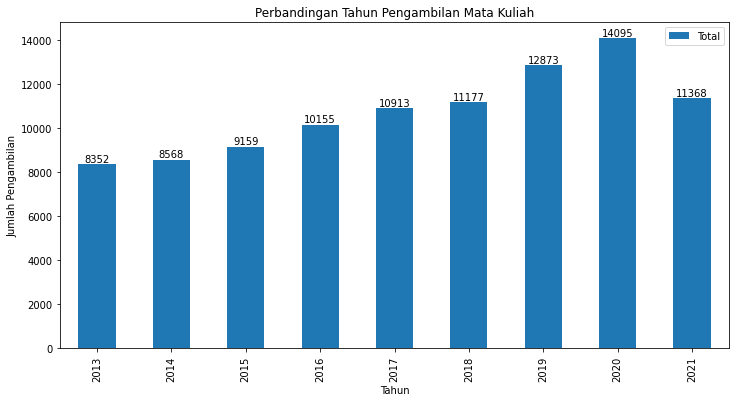

In [ ]:
plt.figure(figsize=(12,6))
ax = df["tahun"].value_counts().sort_index().plot(kind='bar', label='Total', )
plt.title('Perbandingan Tahun Pengambilan Mata Kuliah')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pengambilan')
plt.legend()
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 8, 
            str(round((i.get_height()+8), 2)), fontsize = 10, 
            color = 'black', rotation = 0, ha='center', va="bottom")
plt.show()

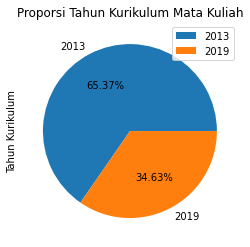

2013    2686
2019    1423
Name: th_kur, dtype: int64

In [ ]:
df_kelas["th_kur"].value_counts().sort_index().plot(kind = "pie", autopct = "%.2f%%", fontsize = 10)
plt.title('Proporsi Tahun Kurikulum Mata Kuliah')
plt.ylabel('Tahun Kurikulum')
plt.legend()
plt.show()
df_kelas["th_kur"].value_counts()

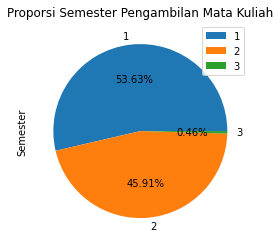

1    51803
2    44340
3      445
Name: semester, dtype: int64

In [ ]:
df["semester"].value_counts().sort_index().plot(kind='pie', autopct = "%.2f%%", fontsize = 10)
plt.title('Proporsi Semester Pengambilan Mata Kuliah')
plt.ylabel('Semester')
plt.legend()
plt.show()
df["semester"].value_counts()

In [ ]:
np.unique(df_kelas['nama_ps_penyelenggara'])

array(['Aktuaria', 'Arsitektur', 'Astronomi', 'Biologi',
       'Desain Interior', 'Desain Komunikasi Visual', 'Desain Produk',
       'Farmasi Klinik dan Komunitas', 'Fisika', 'Informatika',
       'Kewirausahaan', 'Kimia', 'Kriya', 'Manajemen',
       'Manajemen Rekayasa', 'Mata Kuliah Umum (MKU)', 'Matematika',
       'Meteorologi', 'Mikrobiologi', 'Oseanografi',
       'Perencanaan Wilayah dan Kota', 'Seni Rupa',
       'Sistem dan Teknologi Informasi', 'Tahap Tahun Pertama FTMD',
       'Tahap Tahun Pertama STEI', 'Teknik Dirgantara', 'Teknik Elektro',
       'Teknik Fisika', 'Teknik Geologi', 'Teknik Industri',
       'Teknik Informatika', 'Teknik Lingkungan', 'Teknik Mesin',
       'Teknik Perminyakan', 'Teknik Telekomunikasi',
       'Teknik Tenaga Listrik'], dtype=object)

In [ ]:
#Mengganti Program Studi penyelenggara 'Informatika' menjadi 'Teknik Informatika'
df_kelas.loc[(df_kelas['nama_ps_penyelenggara'] == 'Informatika'), 'nama_ps_penyelenggara'] = 'Teknik Informatika'

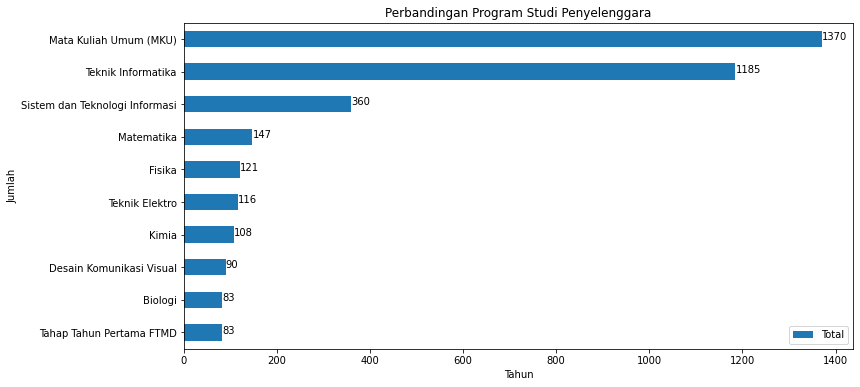

In [ ]:
plt.figure(figsize=(12,6))
ax = df_kelas['nama_ps_penyelenggara'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', label='Total')
plt.title('Perbandingan Program Studi Penyelenggara')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.legend()
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.23, str(round((i.get_width()), 2)), fontsize = 10, color ='black')
plt.show()

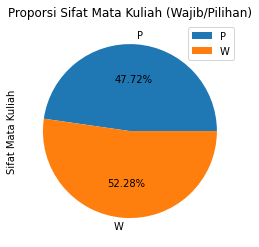

W    2148
P    1961
Name: sifat, dtype: int64

In [ ]:
df_kelas["sifat"].value_counts().sort_index().plot(kind='pie', autopct = "%.2f%%", fontsize = 10)
plt.title('Proporsi Sifat Mata Kuliah (Wajib/Pilihan)')
plt.ylabel('Sifat Mata Kuliah')
plt.legend()
plt.show()
df_kelas["sifat"].value_counts()

In [ ]:
df.join(df_kelas[['kd_kuliah', 'sifat']].set_index('kd_kuliah'), on='kd_kuliah').drop_duplicates()

,kd_kuliah,no_kelas,tahun,semester,id_mhs,nama_kuliah,sifat
0,BI2001-2013,7,2013,1,18208004,Pengetahuan Lingkungan,W
0,BI2001-2013,7,2013,1,18208004,Pengetahuan Lingkungan,P
1,BI2001-2013,7,2013,1,18209003,Pengetahuan Lingkungan,W
1,BI2001-2013,7,2013,1,18209003,Pengetahuan Lingkungan,P
2,BI2001-2013,7,2013,1,18210010,Pengetahuan Lingkungan,W
...,...,...,...,...,...,...,...
96583,MK3012-2019,1,2021,2,18220107,Bisnis Jasa,P
96584,MK3012-2019,1,2021,2,18220057,Bisnis Jasa,P
96585,SR2003-2019,1,2021,2,13520132,Seni Lukis Pilihan,P
96586,SR4205-2019,1,2021,2,18218038,Kajian Perempuan dalam Seni Rupa,P


In [ ]:
df.join(df_kelas[['kd_kuliah', 'sifat']].set_index('kd_kuliah'), on='kd_kuliah').drop_duplicates()['sifat'].value_counts()

W    77882
P    19685
Name: sifat, dtype: int64

###### Karena mata kuliah wajib adalah hal yang harus diambil dan tidak perlu disarankan untuk diambil, maka kami coba untuk menyaring mata kuliah wajib

In [ ]:
len_df = len(df.join(df_kelas[['kd_kuliah', 'sifat']].set_index('kd_kuliah'), on='kd_kuliah').drop_duplicates())
len_df

97567

In [ ]:
df.join(df_kelas[['kd_kuliah', 'sifat']].set_index('kd_kuliah'), on='kd_kuliah').drop_duplicates()['sifat'].value_counts()/(len_df)

W    0.798241
P    0.201759
Name: sifat, dtype: float64

###### Melihat adanya perbedaan jumlah baris, dapat ditinjau bahwa ada beberapa mata kuliah yang wajib sebagai mahasiswa Sistem dan Teknologi Informasi, namun mata kuliah pilihan sebagai mahasiswa Teknik Informatika, dan sebaliknya.

In [ ]:
df_kelas['duplicate'] = df_kelas['kd_kuliah'].duplicated()
df_kelas

,kd_kuliah,th_kur,nama_kuliah,sks,no_kelas,tahun,semester,no_ps_penyelenggara,nama_ps_penyelenggara,sifat,duplicate
0,BI2001-2013,2013,Pengetahuan Lingkungan,2,7,2013,1,106,Biologi,W,False
1,BI2001-2013,2013,Pengetahuan Lingkungan,2,10,2013,1,106,Biologi,P,True
2,DK4117-2013,2013,Komik,3,1,2013,1,174,Desain Komunikasi Visual,P,False
3,EL1200-2013,2013,Pengantar Analisis Rangkaian,2,1,2013,1,132,Teknik Elektro,W,False
4,EL2142-2013,2013,Sistem Digital & Mikroprosesor,4,1,2013,1,132,Teknik Elektro,W,False
...,...,...,...,...,...,...,...,...,...,...,...
4104,SR2003-2019,2019,Seni Lukis Pilihan,3,1,2021,2,170,Seni Rupa,P,False
4105,SR4204-2019,2019,Psikologi Seni,2,1,2021,2,170,Seni Rupa,P,True
4106,SR4205-2019,2019,Kajian Perempuan dalam Seni Rupa,2,1,2021,2,170,Seni Rupa,P,False
4107,TF4012-2019,2019,Pengukuran Berbasis Citra,3,1,2021,2,133,Teknik Fisika,P,False


In [ ]:
df_kelas['duplicate_sifat'] = df_kelas[['kd_kuliah', 'sifat']].duplicated()
df_kelas

,kd_kuliah,th_kur,nama_kuliah,sks,no_kelas,tahun,semester,no_ps_penyelenggara,nama_ps_penyelenggara,sifat,duplicate,duplicate_sifat
0,BI2001-2013,2013,Pengetahuan Lingkungan,2,7,2013,1,106,Biologi,W,False,False
1,BI2001-2013,2013,Pengetahuan Lingkungan,2,10,2013,1,106,Biologi,P,True,False
2,DK4117-2013,2013,Komik,3,1,2013,1,174,Desain Komunikasi Visual,P,False,False
3,EL1200-2013,2013,Pengantar Analisis Rangkaian,2,1,2013,1,132,Teknik Elektro,W,False,False
4,EL2142-2013,2013,Sistem Digital & Mikroprosesor,4,1,2013,1,132,Teknik Elektro,W,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4104,SR2003-2019,2019,Seni Lukis Pilihan,3,1,2021,2,170,Seni Rupa,P,False,False
4105,SR4204-2019,2019,Psikologi Seni,2,1,2021,2,170,Seni Rupa,P,True,True
4106,SR4205-2019,2019,Kajian Perempuan dalam Seni Rupa,2,1,2021,2,170,Seni Rupa,P,False,False
4107,TF4012-2019,2019,Pengukuran Berbasis Citra,3,1,2021,2,133,Teknik Fisika,P,False,False


In [ ]:
df_kelas[(df_kelas['duplicate']) & (df_kelas['duplicate_sifat'] != True)]

,kd_kuliah,th_kur,nama_kuliah,sks,no_kelas,tahun,semester,no_ps_penyelenggara,nama_ps_penyelenggara,sifat,duplicate,duplicate_sifat
1,BI2001-2013,2013,Pengetahuan Lingkungan,2,10,2013,1,106,Biologi,P,True,False
852,II3150-2013,2013,Sistem Multimedia,3,1,2015,1,182,Sistem dan Teknologi Informasi,P,True,False
1181,TI3005-2013,2013,Organisasi & Manajemen Perusahaan Industri,2,3,2015,2,134,Teknik Industri,P,True,False


###### Data di atas merupakan mata kuliah yang diambil oleh mahasiswa Teknik Informatika sebagai mata kuliah pilihan, sedangkan oleh mahasiswa Sistem dan Teknologi Informasi sebagai mata kuliah wajib

###### Data mahasiswa Teknik Informatika

In [ ]:
df_if = df[df['id_mhs'] < 13600000]
df_if["kd_nama_kuliah"] = df_if["kd_kuliah"] + " " + df_if["nama_kuliah"]
df_if

,kd_kuliah,no_kelas,tahun,semester,id_mhs,nama_kuliah,kd_nama_kuliah
12,BI2001-2013,10,2013,1,13512030,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan
32,BI2001-2013,7,2014,1,13511066,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan
49,BI2001-2013,8,2014,1,13511024,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan
50,BI2001-2013,8,2014,1,13511049,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan
51,BI2001-2013,8,2014,1,13511053,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan
...,...,...,...,...,...,...,...
96580,MA2252-2019,1,2021,2,13518086,Pengantar Teori Bilangan,MA2252-2019 Pengantar Teori Bilangan
96581,MA2281-2019,1,2021,2,13520136,Statistika non parametrik,MA2281-2019 Statistika non parametrik
96582,MK3012-2019,1,2021,2,13520167,Bisnis Jasa,MK3012-2019 Bisnis Jasa
96585,SR2003-2019,1,2021,2,13520132,Seni Lukis Pilihan,SR2003-2019 Seni Lukis Pilihan


In [ ]:
df_if['kd_kuliah'].value_counts()

IF2211-2013    918
IF2230-2013    893
IF2210-2013    889
IF4091-2013    874
IF4092-2013    871
              ... 
SR2003-2019      1
IF5145-2013      1
AE4027-2019      1
MK3012-2019      1
MA2251-2013      1
Name: kd_kuliah, Length: 443, dtype: int64

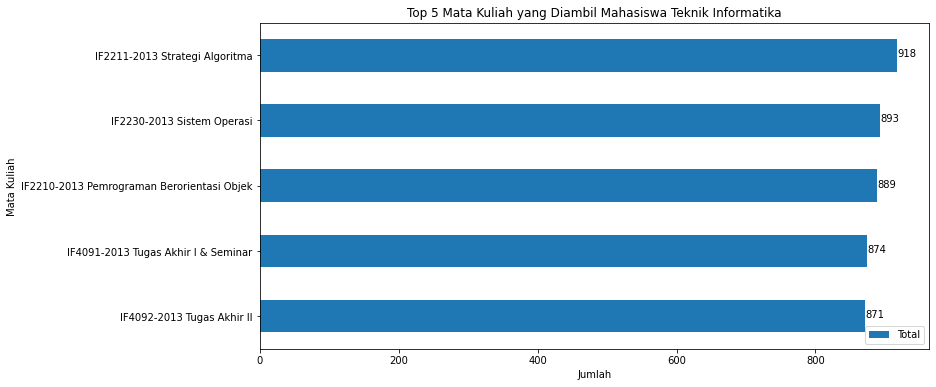

In [ ]:
# Top 5 Seluruh Mata Kuliah yang Diambil Mahasiswa Teknik Informatika
plt.figure(figsize=(12,6))
ax = df_if['kd_nama_kuliah'].value_counts().head().sort_values(ascending=True).plot(kind='barh', label='Total')
plt.title('Top 5 Mata Kuliah yang Diambil Mahasiswa Teknik Informatika')
plt.xlabel('Jumlah')
plt.ylabel('Mata Kuliah')
plt.legend()
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.23, str(round((i.get_width()), 2)), fontsize = 10, color ='black')
plt.show()

In [ ]:
df_if = df_if.join(df_kelas[['kd_kuliah', 'sifat']].set_index('kd_kuliah'), on='kd_kuliah').drop_duplicates()
df_if

,kd_kuliah,no_kelas,tahun,semester,id_mhs,nama_kuliah,kd_nama_kuliah,sifat
12,BI2001-2013,10,2013,1,13512030,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,W
12,BI2001-2013,10,2013,1,13512030,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,P
32,BI2001-2013,7,2014,1,13511066,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,W
32,BI2001-2013,7,2014,1,13511066,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,P
49,BI2001-2013,8,2014,1,13511024,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,W
...,...,...,...,...,...,...,...,...
96580,MA2252-2019,1,2021,2,13518086,Pengantar Teori Bilangan,MA2252-2019 Pengantar Teori Bilangan,P
96581,MA2281-2019,1,2021,2,13520136,Statistika non parametrik,MA2281-2019 Statistika non parametrik,P
96582,MK3012-2019,1,2021,2,13520167,Bisnis Jasa,MK3012-2019 Bisnis Jasa,P
96585,SR2003-2019,1,2021,2,13520132,Seni Lukis Pilihan,SR2003-2019 Seni Lukis Pilihan,P


In [ ]:
# Drop mata kuliah wajib
df_if_p = df_if[(df_if['sifat'] == 'P')]
df_if_p = df_if_p.reset_index().drop(columns='index')
df_if_p

,kd_kuliah,no_kelas,tahun,semester,id_mhs,nama_kuliah,kd_nama_kuliah,sifat
0,BI2001-2013,10,2013,1,13512030,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,P
1,BI2001-2013,7,2014,1,13511066,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,P
2,BI2001-2013,8,2014,1,13511024,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,P
3,BI2001-2013,8,2014,1,13511049,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,P
4,BI2001-2013,8,2014,1,13511053,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,P
...,...,...,...,...,...,...,...,...
13808,MA2252-2019,1,2021,2,13518086,Pengantar Teori Bilangan,MA2252-2019 Pengantar Teori Bilangan,P
13809,MA2281-2019,1,2021,2,13520136,Statistika non parametrik,MA2281-2019 Statistika non parametrik,P
13810,MK3012-2019,1,2021,2,13520167,Bisnis Jasa,MK3012-2019 Bisnis Jasa,P
13811,SR2003-2019,1,2021,2,13520132,Seni Lukis Pilihan,SR2003-2019 Seni Lukis Pilihan,P


In [ ]:
# Drop mata kuliah Bahasa Inggris yang dianggap mata kuliah pilihan
df_if_p = df_if_p[~(df_if_p['kd_kuliah'].str.contains('KU10'))]
df_if_p

,kd_kuliah,no_kelas,tahun,semester,id_mhs,nama_kuliah,kd_nama_kuliah,sifat
0,BI2001-2013,10,2013,1,13512030,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,P
1,BI2001-2013,7,2014,1,13511066,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,P
2,BI2001-2013,8,2014,1,13511024,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,P
3,BI2001-2013,8,2014,1,13511049,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,P
4,BI2001-2013,8,2014,1,13511053,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,P
...,...,...,...,...,...,...,...,...
13808,MA2252-2019,1,2021,2,13518086,Pengantar Teori Bilangan,MA2252-2019 Pengantar Teori Bilangan,P
13809,MA2281-2019,1,2021,2,13520136,Statistika non parametrik,MA2281-2019 Statistika non parametrik,P
13810,MK3012-2019,1,2021,2,13520167,Bisnis Jasa,MK3012-2019 Bisnis Jasa,P
13811,SR2003-2019,1,2021,2,13520132,Seni Lukis Pilihan,SR2003-2019 Seni Lukis Pilihan,P


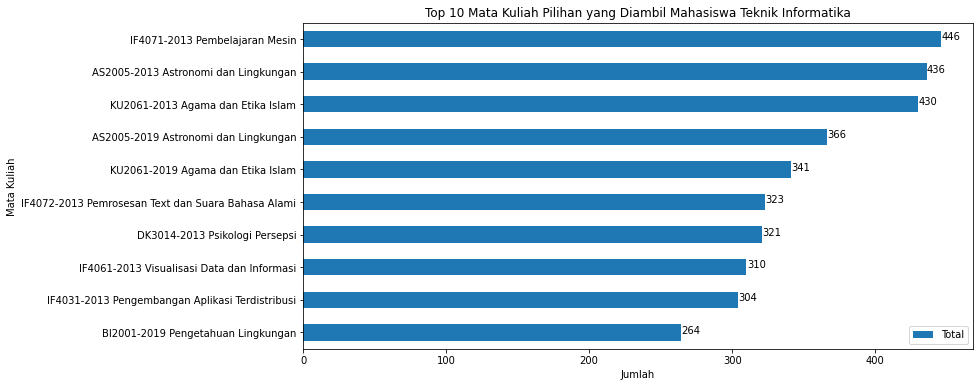

In [ ]:
# Top 10 Mata Kuliah Pilihan yang Diambil Mahasiswa Teknik Informatika
plt.figure(figsize=(12,6))
ax = df_if_p['kd_nama_kuliah'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', label='Total')
plt.title('Top 10 Mata Kuliah Pilihan yang Diambil Mahasiswa Teknik Informatika')
plt.xlabel('Jumlah')
plt.ylabel('Mata Kuliah')
plt.legend()
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.23, str(round((i.get_width()), 2)), fontsize = 10, color ='black')
plt.show()

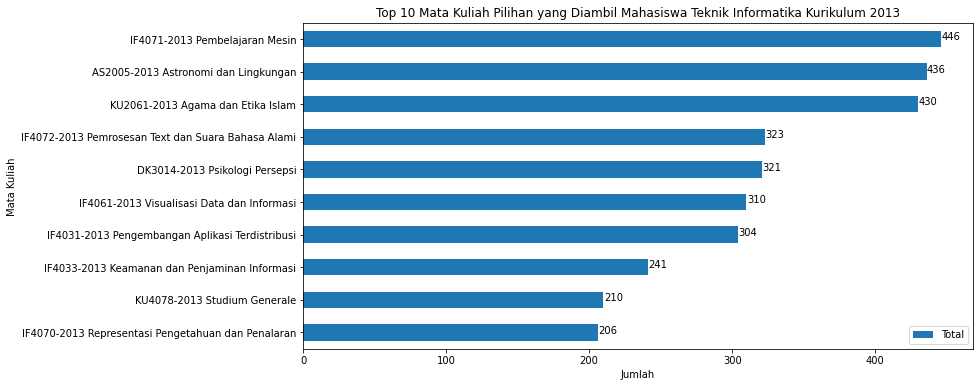

In [ ]:
# Top 10 Mata Kuliah Pilihan yang Diambil Mahasiswa Teknik Informatika Kurikulum 2013
plt.figure(figsize=(12,6))
ax = df_if_p[df_if_p['kd_nama_kuliah'].str.contains('-2013')]['kd_nama_kuliah'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', label='Total')
plt.title('Top 10 Mata Kuliah Pilihan yang Diambil Mahasiswa Teknik Informatika Kurikulum 2013')
plt.xlabel('Jumlah')
plt.ylabel('Mata Kuliah')
plt.legend()
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.23, str(round((i.get_width()), 2)), fontsize = 10, color ='black')
plt.show()

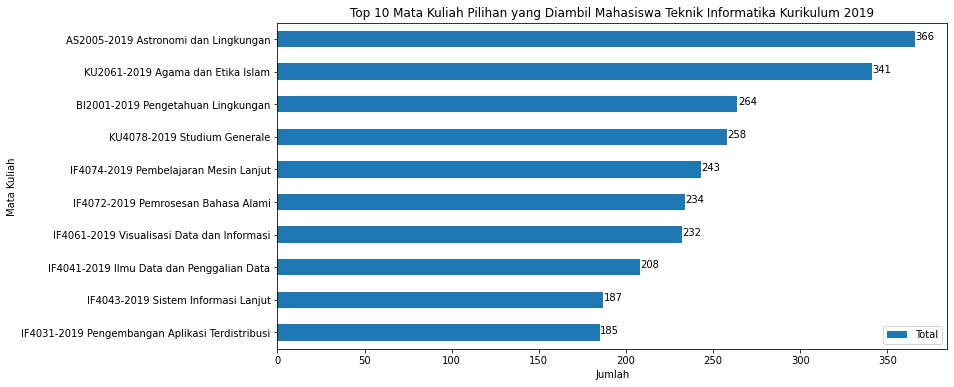

In [ ]:
# Top 10 Mata Kuliah Pilihan yang Diambil Mahasiswa Teknik Informatika Kurikulum 2019
plt.figure(figsize=(12,6))
ax = df_if_p[df_if_p['kd_nama_kuliah'].str.contains('-2019')]['kd_nama_kuliah'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', label='Total')
plt.title('Top 10 Mata Kuliah Pilihan yang Diambil Mahasiswa Teknik Informatika Kurikulum 2019')
plt.xlabel('Jumlah')
plt.ylabel('Mata Kuliah')
plt.legend()
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.23, str(round((i.get_width()), 2)), fontsize = 10, color ='black')
plt.show()

###### Data mahasiswa Sistem dan Teknologi Informasi

In [ ]:
df_sti = df[(df['id_mhs'] < 18300000) & (df['id_mhs'] > 13600000)]
df_sti["kd_nama_kuliah"] = df_sti["kd_kuliah"] + " " + df_sti["nama_kuliah"]
df_sti

,kd_kuliah,no_kelas,tahun,semester,id_mhs,nama_kuliah,kd_nama_kuliah
0,BI2001-2013,7,2013,1,18208004,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan
1,BI2001-2013,7,2013,1,18209003,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan
2,BI2001-2013,7,2013,1,18210010,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan
3,BI2001-2013,7,2013,1,18210011,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan
4,BI2001-2013,7,2013,1,18210012,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan
...,...,...,...,...,...,...,...
96569,II4039-2019,1,2021,2,18219096,Manajemen Produk,II4039-2019 Manajemen Produk
96570,II4039-2019,1,2021,2,18219098,Manajemen Produk,II4039-2019 Manajemen Produk
96583,MK3012-2019,1,2021,2,18220107,Bisnis Jasa,MK3012-2019 Bisnis Jasa
96584,MK3012-2019,1,2021,2,18220057,Bisnis Jasa,MK3012-2019 Bisnis Jasa


In [ ]:
df_sti = df_sti.join(df_kelas[['kd_kuliah', 'sifat']].set_index('kd_kuliah'), on='kd_kuliah').drop_duplicates()
df_sti

,kd_kuliah,no_kelas,tahun,semester,id_mhs,nama_kuliah,kd_nama_kuliah,sifat
0,BI2001-2013,7,2013,1,18208004,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,W
0,BI2001-2013,7,2013,1,18208004,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,P
1,BI2001-2013,7,2013,1,18209003,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,W
1,BI2001-2013,7,2013,1,18209003,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,P
2,BI2001-2013,7,2013,1,18210010,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,W
...,...,...,...,...,...,...,...,...
96569,II4039-2019,1,2021,2,18219096,Manajemen Produk,II4039-2019 Manajemen Produk,P
96570,II4039-2019,1,2021,2,18219098,Manajemen Produk,II4039-2019 Manajemen Produk,P
96583,MK3012-2019,1,2021,2,18220107,Bisnis Jasa,MK3012-2019 Bisnis Jasa,P
96584,MK3012-2019,1,2021,2,18220057,Bisnis Jasa,MK3012-2019 Bisnis Jasa,P


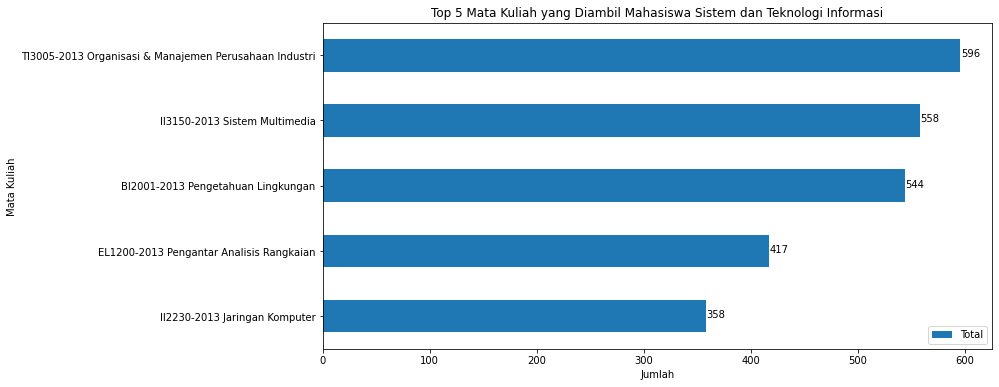

In [ ]:
# Top 5 Seluruh Mata Kuliah yang Diambil Mahasiswa Sistem dan Teknologi Informasi
plt.figure(figsize=(12,6))
ax = df_sti['kd_nama_kuliah'].value_counts().head().sort_values(ascending=True).plot(kind='barh', label='Total')
plt.title('Top 5 Mata Kuliah yang Diambil Mahasiswa Sistem dan Teknologi Informasi')
plt.xlabel('Jumlah')
plt.ylabel('Mata Kuliah')
plt.legend()
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.23, str(round((i.get_width()), 2)), fontsize = 10, color ='black')
plt.show()

In [ ]:
# Drop mata kuliah wajib
df_sti_p = df_sti[(df_sti['sifat'] == 'P')]
df_sti_p = df_sti_p.reset_index().drop(columns='index')
df_sti_p

,kd_kuliah,no_kelas,tahun,semester,id_mhs,nama_kuliah,kd_nama_kuliah,sifat
0,BI2001-2013,7,2013,1,18208004,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,P
1,BI2001-2013,7,2013,1,18209003,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,P
2,BI2001-2013,7,2013,1,18210010,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,P
3,BI2001-2013,7,2013,1,18210011,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,P
4,BI2001-2013,7,2013,1,18210012,Pengetahuan Lingkungan,BI2001-2013 Pengetahuan Lingkungan,P
...,...,...,...,...,...,...,...,...
5867,II4039-2019,1,2021,2,18219096,Manajemen Produk,II4039-2019 Manajemen Produk,P
5868,II4039-2019,1,2021,2,18219098,Manajemen Produk,II4039-2019 Manajemen Produk,P
5869,MK3012-2019,1,2021,2,18220107,Bisnis Jasa,MK3012-2019 Bisnis Jasa,P
5870,MK3012-2019,1,2021,2,18220057,Bisnis Jasa,MK3012-2019 Bisnis Jasa,P


In [ ]:
# Drop mata kuliah wajib yang dianggap mata kuliah pilihan (BI2001-2013, II3150-2013, TI3005-2013) dan mata kuliah Bahasa Inggris
df_sti_p = df_sti_p[(~(df_sti_p['kd_kuliah'].str.contains('BI'))) & (~(df_sti_p['kd_kuliah'].str.contains('II3150-2013'))) & (~(df_sti_p['kd_kuliah'].str.contains('TI'))) & (~(df_sti_p['kd_kuliah'].str.contains('KU10')))]
df_sti_p

,kd_kuliah,no_kelas,tahun,semester,id_mhs,nama_kuliah,kd_nama_kuliah,sifat
272,ET4040-2013,1,2013,1,18210005,"Ekonomi, Bisnis, Regulasi dan Kebijakan Teleko...","ET4040-2013 Ekonomi, Bisnis, Regulasi dan Kebi...",P
273,IF4031-2013,1,2016,1,18213032,Pengembangan Aplikasi Terdistribusi,IF4031-2013 Pengembangan Aplikasi Terdistribusi,P
274,IF4071-2013,1,2013,1,18209013,Pembelajaran Mesin,IF4071-2013 Pembelajaran Mesin,P
275,IF4071-2013,1,2015,1,18212034,Pembelajaran Mesin,IF4071-2013 Pembelajaran Mesin,P
276,IF4071-2013,2,2016,1,18213002,Pembelajaran Mesin,IF4071-2013 Pembelajaran Mesin,P
...,...,...,...,...,...,...,...,...
5867,II4039-2019,1,2021,2,18219096,Manajemen Produk,II4039-2019 Manajemen Produk,P
5868,II4039-2019,1,2021,2,18219098,Manajemen Produk,II4039-2019 Manajemen Produk,P
5869,MK3012-2019,1,2021,2,18220107,Bisnis Jasa,MK3012-2019 Bisnis Jasa,P
5870,MK3012-2019,1,2021,2,18220057,Bisnis Jasa,MK3012-2019 Bisnis Jasa,P


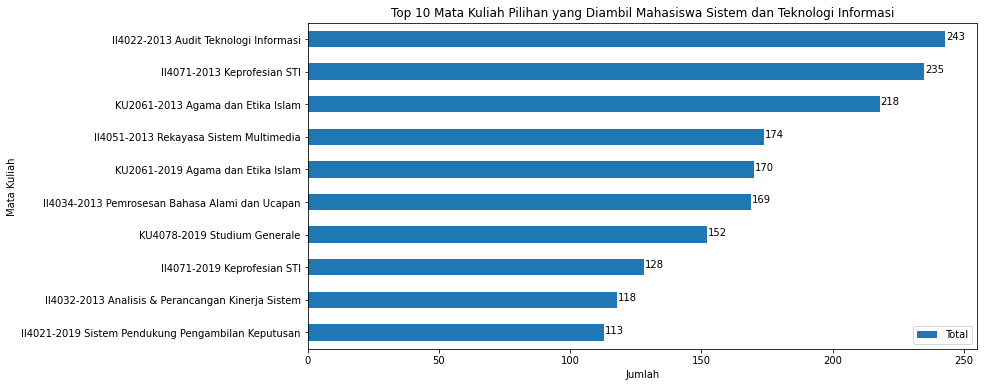

In [ ]:
# Top 10 Mata Kuliah Pilihan yang Diambil Mahasiswa Sistem dan Teknologi Informasi
plt.figure(figsize=(12,6))
ax = df_sti_p['kd_nama_kuliah'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', label='Total')
plt.title('Top 10 Mata Kuliah Pilihan yang Diambil Mahasiswa Sistem dan Teknologi Informasi')
plt.xlabel('Jumlah')
plt.ylabel('Mata Kuliah')
plt.legend()
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.23, str(round((i.get_width()), 2)), fontsize = 10, color ='black')
plt.show()

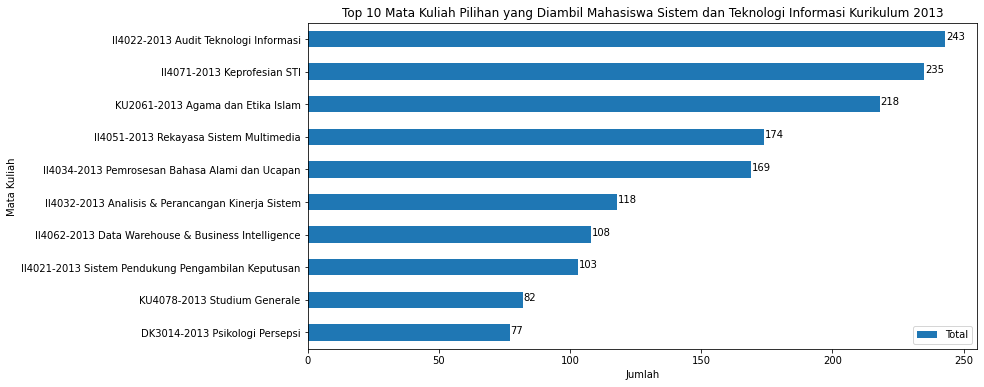

In [ ]:
# Top 10 Mata Kuliah Pilihan yang Diambil Mahasiswa Sistem dan Teknologi Informasi Kurikulum 2013
plt.figure(figsize=(12,6))
ax = df_sti_p[df_sti_p['kd_nama_kuliah'].str.contains('-2013')]['kd_nama_kuliah'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', label='Total')
plt.title('Top 10 Mata Kuliah Pilihan yang Diambil Mahasiswa Sistem dan Teknologi Informasi Kurikulum 2013')
plt.xlabel('Jumlah')
plt.ylabel('Mata Kuliah')
plt.legend()
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.23, str(round((i.get_width()), 2)), fontsize = 10, color ='black')
plt.show()

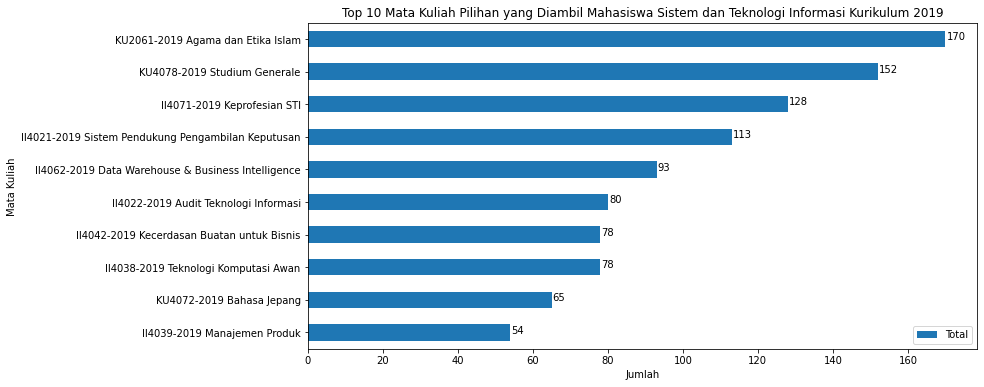

In [ ]:
# Top 10 Mata Kuliah Pilihan yang Diambil Mahasiswa Sistem dan Teknologi Informasi Kurikulum 2019
plt.figure(figsize=(12,6))
ax = df_sti_p[df_sti_p['kd_nama_kuliah'].str.contains('-2019')]['kd_nama_kuliah'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', label='Total')
plt.title('Top 10 Mata Kuliah Pilihan yang Diambil Mahasiswa Sistem dan Teknologi Informasi Kurikulum 2019')
plt.xlabel('Jumlah')
plt.ylabel('Mata Kuliah')
plt.legend()
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.23, str(round((i.get_width()), 2)), fontsize = 10, color ='black')
plt.show()

# Data Preparation

### Group by NIM, Semester, Tahun

In [ ]:
list_df1 = df.groupby(['id_mhs', 'semester', 'tahun'])['kd_kuliah'].apply(list).reset_index(name='list matkul')
list_df1

,id_mhs,semester,tahun,list matkul
0,13507001,1,2013,"[IF4060-2013, IF4070-2013, IF4071-2013, IF4090..."
1,13508001,1,2013,[IF4092-2013]
2,13508002,1,2013,"[IF2120-2013, IF2123-2013, IF2211-2013, IF3110..."
3,13508002,2,2013,"[IF4091-2013, TL2105-2013, IF2210-2013, IF4020..."
4,13508002,3,2013,"[IF2123-2013, IF4092-2013]"
...,...,...,...,...
14889,18220109,2,2021,"[BI2001-2019, KU2071-2019, IF2212-2019, II2220..."
14890,18220110,1,2020,"[FI1101-2019, KU1001-2019, KU1011-2019, KU1024..."
14891,18220110,1,2021,"[IF2111-2019, IF2140-2019, II2110-2019, II2111..."
14892,18220110,2,2020,"[EL1200-2019, IF1210-2019, FI1201-2019, KI1002..."


In [ ]:
list_df1['list matkul']

0        [IF4060-2013, IF4070-2013, IF4071-2013, IF4090...
1                                            [IF4092-2013]
2        [IF2120-2013, IF2123-2013, IF2211-2013, IF3110...
3        [IF4091-2013, TL2105-2013, IF2210-2013, IF4020...
4                               [IF2123-2013, IF4092-2013]
                               ...                        
14889    [BI2001-2019, KU2071-2019, IF2212-2019, II2220...
14890    [FI1101-2019, KU1001-2019, KU1011-2019, KU1024...
14891    [IF2111-2019, IF2140-2019, II2110-2019, II2111...
14892    [EL1200-2019, IF1210-2019, FI1201-2019, KI1002...
14893    [BI2001-2019, KU4078-2019, IF2212-2019, II2220...
Name: list matkul, Length: 14894, dtype: object

###### Format Data

In [ ]:
te1 = TransactionEncoder()
te_fit1 = te1.fit_transform(list_df1['list matkul'])
df_transform1 = pd.DataFrame(te_fit1, columns = te1.columns_)

df_transform1

,AE4020-2019,AE4027-2019,AE4080-2013,AE4092-2013,AK2163-2019,AR2132-2019,AR3231-2013,AR4221-2013,AR4232-2013,AS2005-2013,...,TL2105-2019,TL3205-2013,TL3205-2019,TL4002-2013,TL4103-2013,TL4104-2013,TL4136-2013,TL4233-2013,TM4031-2013,TM4031-2019
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14889,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14890,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14891,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14892,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Group by NIM

In [ ]:
list_df2 = df.groupby('id_mhs')['kd_kuliah'].apply(list).reset_index(name='list matkul')
list_df2

,id_mhs,list matkul
0,13507001,"[IF4060-2013, IF4070-2013, IF4071-2013, IF4090..."
1,13508001,[IF4092-2013]
2,13508002,"[IF2120-2013, IF2123-2013, IF2123-2013, IF2211..."
3,13508003,"[IF4090-2013, IF4091-2013, IF4091-2013, IF4092..."
4,13508004,"[IF4091-2013, IF4092-2013]"
...,...,...
2205,18220106,"[BI2001-2019, EL1200-2019, FI1101-2019, IF1210..."
2206,18220107,"[BI2001-2019, EL1200-2019, FI1101-2019, IF1210..."
2207,18220108,"[BI2001-2019, EL1200-2019, FI1101-2019, IF1210..."
2208,18220109,"[BI2001-2019, EL1200-2019, FI1101-2019, IF1210..."


In [ ]:
list_df2['list matkul']

0       [IF4060-2013, IF4070-2013, IF4071-2013, IF4090...
1                                           [IF4092-2013]
2       [IF2120-2013, IF2123-2013, IF2123-2013, IF2211...
3       [IF4090-2013, IF4091-2013, IF4091-2013, IF4092...
4                              [IF4091-2013, IF4092-2013]
                              ...                        
2205    [BI2001-2019, EL1200-2019, FI1101-2019, IF1210...
2206    [BI2001-2019, EL1200-2019, FI1101-2019, IF1210...
2207    [BI2001-2019, EL1200-2019, FI1101-2019, IF1210...
2208    [BI2001-2019, EL1200-2019, FI1101-2019, IF1210...
2209    [BI2001-2019, EL1200-2019, FI1101-2019, IF1210...
Name: list matkul, Length: 2210, dtype: object

###### Format Data

In [ ]:
te2 = TransactionEncoder()
te_fit2 = te2.fit_transform(list_df2['list matkul'])
df_transform2 = pd.DataFrame(te_fit2, columns = te2.columns_)

df_transform2

,AE4020-2019,AE4027-2019,AE4080-2013,AE4092-2013,AK2163-2019,AR2132-2019,AR3231-2013,AR4221-2013,AR4232-2013,AS2005-2013,...,TL2105-2019,TL3205-2013,TL3205-2019,TL4002-2013,TL4103-2013,TL4104-2013,TL4136-2013,TL4233-2013,TM4031-2013,TM4031-2019
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2207,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2208,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Group by NIM and Filter by Mata Kuliah Pilihan & Program Studi

###### Mahasiswa Teknik Informatika

In [ ]:
list_df3 = df_if_p.groupby('id_mhs')['kd_kuliah'].apply(list).reset_index(name='list matkul')
list_df3

,id_mhs,list matkul
0,13507001,"[IF4060-2013, IF4070-2013, IF4071-2013]"
1,13508002,"[TL2105-2013, IF4020-2013, IF4033-2013, IF4061..."
2,13508008,[KU4012-2013]
3,13508009,"[KU4078-2013, KU4172-2013]"
4,13508010,"[IF4072-2013, IF4021-2013]"
...,...,...
1508,13520163,"[AS2005-2019, KU2061-2019]"
1509,13520164,"[AS2005-2019, KU2061-2019, MA4072-2019]"
1510,13520165,"[AS2005-2019, KU4078-2019, PL4001-2019]"
1511,13520166,[KU2062-2019]


In [ ]:
te3 = TransactionEncoder()
te_fit3 = te3.fit_transform(list_df3['list matkul'])
df_transform3 = pd.DataFrame(te_fit3, columns = te3.columns_)

df_transform3

,AE4020-2019,AE4027-2019,AE4080-2013,AK2163-2019,AR2132-2019,AR3231-2013,AR4232-2013,AS2005-2013,AS2005-2019,AS3002-2013,...,TL2105-2019,TL3205-2013,TL3205-2019,TL4002-2013,TL4103-2013,TL4104-2013,TL4136-2013,TL4233-2013,TM4031-2013,TM4031-2019
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1509,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1510,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1511,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


###### Mahasiswa Sistem dan Teknologi Informasi

In [ ]:
list_df4 = df_sti_p.groupby('id_mhs')['kd_kuliah'].apply(list).reset_index(name='list matkul')
list_df4

,id_mhs,list matkul
0,18208003,"[II4021-2013, II4022-2013, II4033-2013, KU2061..."
1,18208004,"[II4022-2013, KU2061-2013]"
2,18209002,"[KU4012-2013, DK3014-2013]"
3,18209003,"[II4021-2013, II4022-2013, KU2061-2013, II4034..."
4,18209006,"[II4022-2013, IF4061-2013, II4034-2013]"
...,...,...
625,18220106,"[KU2061-2019, KU4078-2019, PL4001-2019]"
626,18220107,"[KU2062-2019, MK3012-2019]"
627,18220108,"[KU2061-2019, KU4072-2019]"
628,18220109,[KU2061-2019]


In [ ]:
te4 = TransactionEncoder()
te_fit4 = te4.fit_transform(list_df4['list matkul'])
df_transform4 = pd.DataFrame(te_fit4, columns = te4.columns_)

df_transform4

,AE4092-2013,AR4221-2013,AS2005-2019,DI4004-2013,DI4004-2019,DK3014-2013,DK3014-2019,DK3016-2013,DK3016-2019,DK3114-2019,...,SR2006-2013,SR3105-2013,SR3108-2013,SR4106-2013,SR4201-2013,SR4201-2019,SR4204-2013,SR4204-2019,SR4205-2019,TL4002-2013
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
626,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
627,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
628,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Modeling and Evaluation

### Dataframe Group by NIM, Semester, Tahun

pada tahap ini akan dilihat perbandingan algoritma FP-Growth dan Apriori untuk selanjutnya dipilih algoritma yang digunakan dalam pembuatan model

In [ ]:
import time

def check_runtime(min_support, method):
    if method == 'fpgrowth':
        start = time.time()
        get_fpgrowth = fpgrowth(df_transform1, min_support=min_support, use_colnames=True)
        df_fpgrowth = association_rules(get_fpgrowth, metric='confidence', min_threshold=0.8)
        end = time.time()
        runtime = end - start
        return runtime
    elif method == 'apriori':
        start = time.time()
        get_apriori = apriori(df_transform1, min_support=min_support, use_colnames=True)
        association_rules(get_apriori, metric='confidence', min_threshold=0.8)
        end = time.time()
        runtime = end - start
        return runtime

In [ ]:
data = [[0.08, check_runtime(0.08, 'fpgrowth'), check_runtime(0.08, 'apriori')], 
        [0.06, check_runtime(0.06, 'fpgrowth'), check_runtime(0.06, 'apriori')],
        [0.04, check_runtime(0.04, 'fpgrowth'), check_runtime(0.04, 'apriori')],
        [0.02, check_runtime(0.02, 'fpgrowth'), check_runtime(0.02, 'apriori')], 
        [0.01, check_runtime(0.01, 'fpgrowth'), check_runtime(0.01, 'apriori')],
        [0.005, check_runtime(0.005, 'fpgrowth'), check_runtime(0.005, 'apriori')]]

df_runtime = pd.DataFrame(data, columns = ['min_support', 'fpgrowth', 'apriori'])
df_runtime

,min_support,fpgrowth,apriori
0,0.080,0.091748,0.016987
1,0.060,0.157573,0.121648
2,0.040,0.161601,1.937538
3,0.020,0.251325,6.593542
4,0.010,0.447289,23.729083
5,0.005,0.714267,75.747570


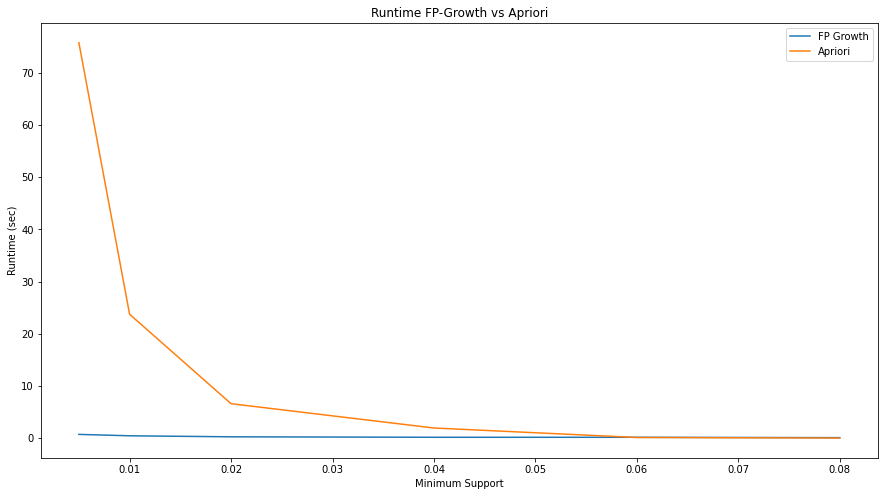

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df_runtime['min_support'], df_runtime['fpgrowth'], label='FP Growth')
plt.plot(df_runtime['min_support'], df_runtime['apriori'], label='Apriori')
plt.title('Runtime FP-Growth vs Apriori')
plt.xlabel('Minimum Support')
plt.ylabel('Runtime (sec)')
plt.legend()
plt.show()

Runtime algoritma Apriori jauh lebih lama dibandingkan runtime FP Growth, terutama semakin kecil minimum support

In [ ]:
def assoc_rules(df, min_support, method, metric, min_threshold):
    if method == 'fpgrowth':
        get_fpgrowth = fpgrowth(df, min_support=min_support, use_colnames=True)
        df_fpgrowth = association_rules(get_fpgrowth, metric=metric, min_threshold=min_threshold)
        df_fpgrowth['ant_length'] = df_fpgrowth['antecedents'].apply(lambda x: len(x))
        df_fpgrowth['con_length'] = df_fpgrowth['consequents'].apply(lambda x: len(x))
        return df_fpgrowth
    elif method == 'apriori':
        get_apriori = apriori(df, min_support=min_support, use_colnames=True)
        df_apriori = association_rules(get_apriori, metric=metric, min_threshold=min_threshold)
        df_apriori['ant_length'] = df_apriori['antecedents'].apply(lambda x: len(x))
        df_apriori['con_length'] = df_apriori['consequents'].apply(lambda x: len(x))
        return df_apriori

In [ ]:
assoc_rules(df_transform1, 0.025, 'fpgrowth', 'confidence', 0.8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ant_length,con_length
0,(IF4090-2013),(IF4091-2013),0.043306,0.058681,0.040956,0.945736,16.116474,0.038415,17.347158,1,1
1,(IF4150-2013),(IF4090-2013),0.044985,0.043306,0.040419,0.898507,20.747861,0.038471,9.426249,1,1
2,(IF4090-2013),(IF4150-2013),0.043306,0.044985,0.040419,0.933333,20.747861,0.038471,14.325232,1,1
3,"(IF4150-2013, IF4090-2013)",(IF4091-2013),0.040419,0.058681,0.039479,0.976744,16.644883,0.037107,40.476702,2,1
4,"(IF4150-2013, IF4091-2013)",(IF4090-2013),0.041829,0.043306,0.039479,0.943820,21.794199,0.037668,17.029153,2,1
...,...,...,...,...,...,...,...,...,...,...,...
10166,(EL1200-2019),"(MA1201-2019, FI1201-2019, KU1202-2019, KI1002...",0.048946,0.041359,0.041359,0.844993,20.430727,0.039335,6.184507,1,5
10167,(FI1201-2019),"(MA1201-2019, EL1200-2019, KU1202-2019, KI1002...",0.041963,0.041359,0.041359,0.985600,23.830400,0.039623,66.572296,1,5
10168,(KU1202-2019),"(MA1201-2019, EL1200-2019, FI1201-2019, KI1002...",0.041628,0.041359,0.041359,0.993548,24.022581,0.039637,148.589365,1,5
10169,(KI1002-2019),"(MA1201-2019, EL1200-2019, FI1201-2019, KU1202...",0.042299,0.041359,0.041359,0.977778,23.641270,0.039609,43.138848,1,5


In [ ]:
assoc_rules(df_transform1, 0.025, 'apriori', 'confidence', 0.8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ant_length,con_length
0,(FI1201-2013),(EL1200-2013),0.076407,0.086008,0.075198,0.984183,11.442949,0.068627,57.784619,1,1
1,(EL1200-2013),(FI1201-2013),0.086008,0.076407,0.075198,0.874317,11.442949,0.068627,7.348591,1,1
2,(EL1200-2013),(IF1210-2013),0.086008,0.074997,0.074527,0.866511,11.553991,0.068076,6.929411,1,1
3,(IF1210-2013),(EL1200-2013),0.074997,0.086008,0.074527,0.993733,11.553991,0.068076,145.847043,1,1
4,(KI1202-2013),(EL1200-2013),0.079227,0.086008,0.076004,0.959322,11.153897,0.069190,22.468975,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10166,(IF3140-2019),"(IF3141-2019, IF3170-2019, IF3150-2019, IF3151...",0.036458,0.033436,0.033168,0.909761,27.208784,0.031949,10.711104,1,6
10167,(IF3150-2019),"(IF3141-2019, IF3170-2019, IF3140-2019, IF3151...",0.035182,0.033168,0.033168,0.942748,28.423664,0.032001,16.887337,1,6
10168,(IF3151-2019),"(IF3141-2019, IF3170-2019, IF3140-2019, IF3150...",0.035518,0.033571,0.033168,0.933837,27.817149,0.031975,14.606891,1,6
10169,(IF3110-2019),"(IF3141-2019, IF3170-2019, IF3140-2019, IF3150...",0.036592,0.033235,0.033168,0.906422,27.273231,0.031952,10.331118,1,6


Dengan hasil <i>association rules</i> yang sama antara FP Growth dan Apriori namun runtime FP Growth yang jauh lebih cepat, maka untuk ke depannya akan digunakan algoritma <b>FP Growth</b>

In [ ]:
def filter_assoc_rules(df, min_lift, min_leverage, min_conviction):
    df = df.loc[(df["lift"] >= min_lift) & (df["leverage"] >= min_leverage) & (df["conviction"] > min_conviction)]
    return df

##### Association Rules Evaluation Metrics

<b>Confidence</b>: The confidence of a rule A->C is the probability of seeing the consequent in a transaction given that it also contains the antecedent<br>
<b>Lift</b>: The lift metric is commonly used to measure how much more often the antecedent and consequent of a rule A->C occur together than we would expect if they were statistically independent<br>
<b>Leverage</b>: Leverage computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent<br>
<b>Conviction</b>: A high conviction value means that the consequent is highly depending on the antecedent<br>

In [ ]:
df_assoc_1 = assoc_rules(df_transform1, 0.025, 'fpgrowth', 'confidence', 0.8)
df_assoc_1_fil = filter_assoc_rules(df_assoc_1, 1, 0.04, 1)
df_assoc_1_fil

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ant_length,con_length
27,(IF2211-2013),(IF2210-2013),0.061703,0.079495,0.053579,0.868335,10.923128,0.048674,6.991273,1,1
28,(IF2123-2013),(IF2120-2013),0.058211,0.054989,0.051027,0.876586,15.941234,0.047826,7.657242,1,1
29,(IF2120-2013),(IF2123-2013),0.054989,0.058211,0.051027,0.927961,15.941234,0.047826,13.073303,1,1
30,(IF2120-2013),(IF2130-2013),0.054989,0.056130,0.052504,0.954823,17.010925,0.049418,20.892690,1,1
31,(IF2130-2013),(IF2120-2013),0.056130,0.054989,0.052504,0.935407,17.010925,0.049418,14.630177,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4561,(EL1200-2013),"(KU1201-2013, IF1210-2013, KI1202-2013, KU1011...",0.086008,0.074258,0.074258,0.863388,11.626854,0.067871,6.776431,1,6
4562,(MA1201-2013),"(KU1201-2013, IF1210-2013, KI1202-2013, KU1011...",0.077212,0.074325,0.074258,0.961739,12.939605,0.068519,24.193772,1,6
4563,(FI1201-2013),"(KU1201-2013, IF1210-2013, KI1202-2013, KU1011...",0.076407,0.074258,0.074258,0.971880,13.087873,0.068584,32.921697,1,6
8981,(KI1002-2019),(FI1201-2019),0.042299,0.041963,0.041829,0.988889,23.565618,0.040054,86.223311,1,1


### Dataframe Group by NIM

In [ ]:
df_assoc_3 = assoc_rules(df_transform3, 0.01, 'fpgrowth', 'confidence', 0.1)
df_assoc_3 = df_assoc_3.sort_values(by='confidence', ascending=False)
df_assoc_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ant_length,con_length
31068,"(IF4052-2019, KU4183-2019, BI2001-2019)",(IF3159-2019),0.010575,0.101785,0.010575,1.0,9.824675,0.009499,inf,3,1
18556,"(IF4072-2013, KU4183-2013)",(IF4071-2013),0.012558,0.294118,0.012558,1.0,3.400000,0.008864,inf,2,1
16126,"(IF4072-2013, DK3014-2013, KU4273-2013)",(IF4071-2013),0.019167,0.294118,0.019167,1.0,3.400000,0.013530,inf,3,1
9687,"(IF4074-2019, IF4072-2019, KU4184-2013)",(IF4150-2019),0.012558,0.113681,0.012558,1.0,8.796512,0.011130,inf,3,1
26902,"(IF4071-2019, AS2005-2013, IF4031-2019)",(IF4150-2019),0.012558,0.113681,0.012558,1.0,8.796512,0.011130,inf,3,1
...,...,...,...,...,...,...,...,...,...,...,...
14640,"(IF4061-2013, IF4071-2013)","(IF4040-2013, AS2005-2013)",0.138797,0.039656,0.013880,0.1,2.521667,0.008376,1.067049,2,2
8683,"(IF4061-2013, IF4071-2013)","(KU4079-2013, DK3014-2013, IF4031-2013)",0.138797,0.031725,0.013880,0.1,3.152083,0.009476,1.075861,2,3
22112,"(IF4061-2013, IF4071-2013)","(KU4072-2013, DK4206-2013)",0.138797,0.029742,0.013880,0.1,3.362222,0.009752,1.078064,2,2
7548,(KU4078-2013),"(KU4079-2013, IF4031-2013, IF4071-2013, AS2005...",0.138797,0.031064,0.013880,0.1,3.219149,0.009568,1.076595,1,4


In [ ]:
df_assoc_3.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ant_length,con_length
count,32141.000000,32141.000000,32141.000000,32141.000000,32141.000000,32141.000000,3.214100e+04,32141.000000,32141.00000
mean,0.067896,0.111065,0.017161,0.346937,3.764859,0.011199,inf,2.138017,1.75427
std,0.049479,0.076323,0.009838,0.209270,2.368638,0.006190,NaN,0.843323,0.75945
min,0.010575,0.010575,0.010575,0.100000,0.394608,-0.027486,8.067197e-01,1.000000,1.00000
25%,0.033047,0.051553,0.011897,0.177156,2.452685,0.007954,1.137286e+00,2.000000,1.00000
50%,0.053536,0.088566,0.013880,0.285714,3.165824,0.009668,1.265367e+00,2.000000,2.00000
75%,0.091210,0.154660,0.018506,0.470588,4.265977,0.012584,1.598251e+00,3.000000,2.00000
max,0.294118,0.294118,0.179775,1.000000,25.980808,0.117181,inf,5.000000,5.00000


In [ ]:
df_assoc_3 = filter_assoc_rules(df_assoc_3, 1, 0.001, 1)
df_assoc_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ant_length,con_length
31068,"(IF4052-2019, KU4183-2019, BI2001-2019)",(IF3159-2019),0.010575,0.101785,0.010575,1.0,9.824675,0.009499,inf,3,1
18556,"(IF4072-2013, KU4183-2013)",(IF4071-2013),0.012558,0.294118,0.012558,1.0,3.400000,0.008864,inf,2,1
16126,"(IF4072-2013, DK3014-2013, KU4273-2013)",(IF4071-2013),0.019167,0.294118,0.019167,1.0,3.400000,0.013530,inf,3,1
9687,"(IF4074-2019, IF4072-2019, KU4184-2013)",(IF4150-2019),0.012558,0.113681,0.012558,1.0,8.796512,0.011130,inf,3,1
26902,"(IF4071-2019, AS2005-2013, IF4031-2019)",(IF4150-2019),0.012558,0.113681,0.012558,1.0,8.796512,0.011130,inf,3,1
...,...,...,...,...,...,...,...,...,...,...,...
14640,"(IF4061-2013, IF4071-2013)","(IF4040-2013, AS2005-2013)",0.138797,0.039656,0.013880,0.1,2.521667,0.008376,1.067049,2,2
8683,"(IF4061-2013, IF4071-2013)","(KU4079-2013, DK3014-2013, IF4031-2013)",0.138797,0.031725,0.013880,0.1,3.152083,0.009476,1.075861,2,3
22112,"(IF4061-2013, IF4071-2013)","(KU4072-2013, DK4206-2013)",0.138797,0.029742,0.013880,0.1,3.362222,0.009752,1.078064,2,2
7548,(KU4078-2013),"(KU4079-2013, IF4031-2013, IF4071-2013, AS2005...",0.138797,0.031064,0.013880,0.1,3.219149,0.009568,1.076595,1,4


In [ ]:
list_df3['rekomendasi matkul'] = ''

In [ ]:
for i in range(len(list_df3)):
    list_matkul = frozenset(list_df3['list matkul'].values[i].copy())
    list_rekomendasi = list()
    for j in range(len(df_assoc_3)):
        list_antecedents = df_assoc_3['antecedents'].values[j].copy()
        list_consequents = df_assoc_3['consequents'].values[j].copy()
        if list_antecedents.issubset(list_matkul):
            for consequents in list_consequents:
                if consequents not in list_rekomendasi:
                    if consequents not in list_df3['list matkul'].values[i]:
                        list_rekomendasi.append(consequents)
        if len(list_rekomendasi) == 7:
            break

    list_df3['rekomendasi matkul'].values[i] = list_rekomendasi

list_df3

,id_mhs,list matkul,rekomendasi matkul
0,13507001,"[IF4060-2013, IF4070-2013, IF4071-2013]","[IF4072-2013, AS2005-2013, DK3014-2013, KU2061..."
1,13508002,"[TL2105-2013, IF4020-2013, IF4033-2013, IF4061...","[IF4071-2013, IF4031-2013, KU2061-2013, AS2005..."
2,13508008,[KU4012-2013],"[IF4071-2013, IF4061-2013, DK3014-2013, IF4072..."
3,13508009,"[KU4078-2013, KU4172-2013]","[AS2005-2013, IF4071-2013, DK3014-2013, KU2061..."
4,13508010,"[IF4072-2013, IF4021-2013]","[IF4071-2013, AS2005-2013, DK3014-2013, IF4061..."
...,...,...,...
1508,13520163,"[AS2005-2019, KU2061-2019]","[KU4078-2019, BI2001-2019, IF4061-2019, KU4072..."
1509,13520164,"[AS2005-2019, KU2061-2019, MA4072-2019]","[KU4078-2019, BI2001-2019, IF4061-2019, KU4072..."
1510,13520165,"[AS2005-2019, KU4078-2019, PL4001-2019]","[KU2061-2019, BI2001-2019, IF4074-2019, IF4061..."
1511,13520166,[KU2062-2019],"[BI2001-2019, AS2005-2019, KU4078-2019]"


In [ ]:
def recommend(nim):
    if (int(str(nim)[:3]) == 135):
        data = list_df3[list_df3['id_mhs'] == nim]['rekomendasi matkul'].values[0]
    elif (int(str(nim)[:3]) == 182):
        data = list_df4[list_df4['id_mhs'] == nim]['rekomendasi matkul'].values[0]
    df_kelas_copy = df_kelas.copy()[['kd_kuliah', 'nama_kuliah', 'sks', 'nama_ps_penyelenggara']]
    df_kelas_rec = df_kelas_copy[df_kelas_copy['kd_kuliah'].isin(data)]
    return df_kelas_rec.drop_duplicates().reset_index(drop=True)

##### Evaluation Metrics Minimum Threshold
<b>Support</b> = 0.025 <br>
<b>Confidence</b> = 0.1 <br>
<b>Lift</b> = 1<br>
<b>Leverage</b> = 0.001<br>
<b>Conviction</b> = 1<br>

In [ ]:
recommend(13518070)

,kd_kuliah,nama_kuliah,sks,nama_ps_penyelenggara
0,KU2061-2013,Agama dan Etika Islam,2,Mata Kuliah Umum (MKU)
1,BI2001-2019,Pengetahuan Lingkungan,2,Biologi
2,IF3159-2019,Dasar Pembangunan Perangkat Lunak,1,Teknik Informatika
3,IF4052-2019,Komputasi Layanan,3,Teknik Informatika
4,IF4074-2019,Pembelajaran Mesin Lanjut,2,Teknik Informatika
5,IF4150-2019,Rekayasa Perangkat Lunak Spesifik Domain,2,Teknik Informatika
6,II4038-2019,Teknologi Komputasi Awan,2,Sistem dan Teknologi Informasi


In [ ]:
df_assoc_3 = df_assoc_3.sort_values(by='lift', ascending=False)
df_assoc_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ant_length,con_length
9960,"(IF4042-2013, DK3016-2013)","(DK3014-2013, IF2112-2013, IF4071-2013)",0.014541,0.029742,0.011236,0.772727,25.980808,0.010803,4.269134,2,3
9957,"(DK3014-2013, IF2112-2013, IF4071-2013)","(IF4042-2013, DK3016-2013)",0.029742,0.014541,0.011236,0.377778,25.980808,0.010803,1.583774,3,2
31738,"(IF4052-2019, II4038-2019)","(IF3159-2019, II4032-2019, IF4031-2019)",0.025777,0.021150,0.013880,0.538462,25.459135,0.013335,2.120842,2,3
31729,"(IF3159-2019, II4032-2019, IF4031-2019)","(IF4052-2019, II4038-2019)",0.021150,0.025777,0.013880,0.656250,25.459135,0.013335,2.834104,3,2
31735,"(II4038-2019, IF4031-2019)","(IF4052-2019, II4032-2019, IF3159-2019)",0.022472,0.025116,0.013880,0.617647,24.592105,0.013315,2.549697,2,3
...,...,...,...,...,...,...,...,...,...,...,...
23062,"(AS2005-2019, KU2061-2019)",(IF4061-2019),0.140119,0.151355,0.022472,0.160377,1.059611,0.001264,1.010746,2,1
27557,(KU2061-2019),(IF4043-2019),0.224058,0.122274,0.028420,0.126844,1.037375,0.001024,1.005234,1,1
27556,(IF4043-2019),(KU2061-2019),0.122274,0.224058,0.028420,0.232432,1.037375,0.001024,1.010910,1,1
27550,(AS2005-2013),(IF4043-2019),0.283543,0.122274,0.035691,0.125874,1.029446,0.001021,1.004119,1,1


In [ ]:
for i in range(len(list_df3)):
    list_matkul = frozenset(list_df3['list matkul'].values[i].copy())
    list_rekomendasi = list()
    for j in range(len(df_assoc_3)):
        list_antecedents = df_assoc_3['antecedents'].values[j].copy()
        list_consequents = df_assoc_3['consequents'].values[j].copy()
        if list_antecedents.issubset(list_matkul):
            for consequents in list_consequents:
                if consequents not in list_rekomendasi:
                    if consequents not in list_df3['list matkul'].values[i]:
                        list_rekomendasi.append(consequents)
        if len(list_rekomendasi) == 7:
            break

    list_df3['rekomendasi matkul'].values[i] = list_rekomendasi

list_df3

,id_mhs,list matkul,rekomendasi matkul
0,13507001,"[IF4060-2013, IF4070-2013, IF4071-2013]","[IF4042-2013, DK3014-2013, IF2112-2013, IF4072..."
1,13508002,"[TL2105-2013, IF4020-2013, IF4033-2013, IF4061...","[IF2112-2013, IF4071-2013, DK3014-2013, KU2061..."
2,13508008,[KU4012-2013],"[DK3014-2013, BI2001-2013, IF2112-2013, IF4071..."
3,13508009,"[KU4078-2013, KU4172-2013]","[IF4071-2013, IF4043-2013, KU2061-2013, KU4079..."
4,13508010,"[IF4072-2013, IF4021-2013]","[IF4042-2013, IF2112-2013, DK3014-2013, DK3016..."
...,...,...,...
1508,13520163,"[AS2005-2019, KU2061-2019]","[KU4273-2019, KU4072-2019, IF4061-2019, KU4078..."
1509,13520164,"[AS2005-2019, KU2061-2019, MA4072-2019]","[KU4273-2019, KU4072-2019, IF4061-2019, KU4078..."
1510,13520165,"[AS2005-2019, KU4078-2019, PL4001-2019]","[KU4072-2019, KU2061-2019, KU4183-2019, KU2062..."
1511,13520166,[KU2062-2019],"[BI2001-2019, KU4078-2019, AS2005-2019]"


In [ ]:
recommend(13518070)

,kd_kuliah,nama_kuliah,sks,nama_ps_penyelenggara
0,BI2001-2019,Pengetahuan Lingkungan,2,Biologi
1,IF3159-2019,Dasar Pembangunan Perangkat Lunak,1,Teknik Informatika
2,IF4043-2019,Sistem Informasi Lanjut,3,Teknik Informatika
3,IF4052-2019,Komputasi Layanan,3,Teknik Informatika
4,IF4072-2019,Pemrosesan Bahasa Alami,2,Teknik Informatika
5,IF4074-2019,Pembelajaran Mesin Lanjut,2,Teknik Informatika
6,II4038-2019,Teknologi Komputasi Awan,2,Sistem dan Teknologi Informasi


In [ ]:
df_assoc_4 = assoc_rules(df_transform4, 0.01, 'fpgrowth', 'confidence', 0.1)
df_assoc_4 = df_assoc_4.sort_values(by='confidence', ascending=False)
df_assoc_4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ant_length,con_length
42076,"(II4071-2019, KU4193-2019, KU4078-2019, II4022...",(II4062-2019),0.011111,0.141270,0.011111,1.0,7.078652,0.009541,inf,4,1
19123,"(KU4182-2013, KU2061-2013)",(II4022-2013),0.011111,0.377778,0.011111,1.0,2.647059,0.006914,inf,2,1
14223,"(KU2061-2013, II4051-2013, KU4095-2013, II4022...",(II4071-2013),0.017460,0.360317,0.017460,1.0,2.775330,0.011169,inf,4,1
30551,"(TL4002-2013, II4034-2013, II4051-2013, MR3002...",(II4071-2013),0.020635,0.360317,0.020635,1.0,2.775330,0.013200,inf,4,1
19120,"(II4034-2013, KU4182-2013)",(II4022-2013),0.011111,0.377778,0.011111,1.0,2.647059,0.006914,inf,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1128,"(II4034-2013, II4071-2013, II4022-2013)","(II4062-2013, II4021-2013, KU2061-2013)",0.174603,0.039683,0.017460,0.1,2.520000,0.010532,1.067019,3,3
4506,"(II4034-2013, II4071-2013, II4022-2013)","(II4032-2013, II4033-2013)",0.174603,0.030159,0.017460,0.1,3.315789,0.012195,1.077601,3,2
7722,"(KU4078-2013, II4071-2013)","(KU4012-2013, DK3014-2013)",0.111111,0.017460,0.011111,0.1,5.727273,0.009171,1.091711,2,2
16478,"(KU4078-2013, II4071-2013)","(KU2061-2013, II4051-2013, DK3016-2013, II4022...",0.111111,0.023810,0.011111,0.1,4.200000,0.008466,1.084656,2,4


In [ ]:
df_assoc_4.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ant_length,con_length
count,42870.000000,42870.000000,42870.000000,42870.000000,42870.000000,42870.000000,4.287000e+04,42870.000000,42870.000000
mean,0.073419,0.127518,0.020664,0.407894,3.999269,0.013611,inf,2.587894,2.152181
std,0.062491,0.095044,0.015885,0.258356,3.312526,0.009789,NaN,1.052344,0.977710
min,0.011111,0.011111,0.011111,0.100000,0.264706,-0.066138,6.913580e-01,1.000000,1.000000
25%,0.028571,0.053968,0.012698,0.186047,2.458194,0.008503,1.147014e+00,2.000000,1.000000
50%,0.053968,0.100000,0.015873,0.333333,3.178554,0.010726,1.335503e+00,2.000000,2.000000
75%,0.100000,0.177778,0.022222,0.588235,4.583333,0.015329,2.012302e+00,3.000000,3.000000
max,0.377778,0.377778,0.303175,1.000000,70.000000,0.167055,inf,7.000000,7.000000


In [ ]:
df_assoc_4 = filter_assoc_rules(df_assoc_4, 1, 0.001, 1)
df_assoc_4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ant_length,con_length
42076,"(II4071-2019, KU4193-2019, KU4078-2019, II4022...",(II4062-2019),0.011111,0.141270,0.011111,1.0,7.078652,0.009541,inf,4,1
19123,"(KU4182-2013, KU2061-2013)",(II4022-2013),0.011111,0.377778,0.011111,1.0,2.647059,0.006914,inf,2,1
14223,"(KU2061-2013, II4051-2013, KU4095-2013, II4022...",(II4071-2013),0.017460,0.360317,0.017460,1.0,2.775330,0.011169,inf,4,1
30551,"(TL4002-2013, II4034-2013, II4051-2013, MR3002...",(II4071-2013),0.020635,0.360317,0.020635,1.0,2.775330,0.013200,inf,4,1
19120,"(II4034-2013, KU4182-2013)",(II4022-2013),0.011111,0.377778,0.011111,1.0,2.647059,0.006914,inf,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1128,"(II4034-2013, II4071-2013, II4022-2013)","(II4062-2013, II4021-2013, KU2061-2013)",0.174603,0.039683,0.017460,0.1,2.520000,0.010532,1.067019,3,3
4506,"(II4034-2013, II4071-2013, II4022-2013)","(II4032-2013, II4033-2013)",0.174603,0.030159,0.017460,0.1,3.315789,0.012195,1.077601,3,2
7722,"(KU4078-2013, II4071-2013)","(KU4012-2013, DK3014-2013)",0.111111,0.017460,0.011111,0.1,5.727273,0.009171,1.091711,2,2
16478,"(KU4078-2013, II4071-2013)","(KU2061-2013, II4051-2013, DK3016-2013, II4022...",0.111111,0.023810,0.011111,0.1,4.200000,0.008466,1.084656,2,4


In [ ]:
list_df4['rekomendasi matkul'] = ''

In [ ]:
for i in range(len(list_df4)):
    list_matkul = frozenset(list_df4['list matkul'].values[i].copy())
    list_rekomendasi = list()
    for j in range(len(df_assoc_4)):
        list_antecedents = df_assoc_4['antecedents'].values[j].copy()
        list_consequents = df_assoc_4['consequents'].values[j].copy()
        if list_antecedents.issubset(list_matkul):
            for consequents in list_consequents:
                if consequents not in list_rekomendasi:
                    if consequents not in list_df4['list matkul'].values[i]:
                        list_rekomendasi.append(consequents)
        if len(list_rekomendasi) == 7:
            break

    list_df4['rekomendasi matkul'].values[i] = list_rekomendasi

list_df4

,id_mhs,list matkul,rekomendasi matkul
0,18208003,"[II4021-2013, II4022-2013, II4033-2013, KU2061...","[II4071-2013, II4051-2013, II4034-2013, II4032..."
1,18208004,"[II4022-2013, KU2061-2013]","[II4071-2013, II4051-2013, II4034-2013, II4032..."
2,18209002,"[KU4012-2013, DK3014-2013]","[II4022-2013, II4071-2013, KU4078-2013, II4051..."
3,18209003,"[II4021-2013, II4022-2013, KU2061-2013, II4034...","[II4071-2013, II4051-2013, II4032-2013, II4062..."
4,18209006,"[II4022-2013, IF4061-2013, II4034-2013]","[II4071-2013, KU2061-2013, II4051-2013, II4032..."
...,...,...,...
625,18220106,"[KU2061-2019, KU4078-2019, PL4001-2019]","[II4071-2019, II4021-2019, II4022-2019, II4062..."
626,18220107,"[KU2062-2019, MK3012-2019]","[KU4078-2019, II4039-2019, II4071-2019, II4033..."
627,18220108,"[KU2061-2019, KU4072-2019]","[II4071-2019, II4021-2019, KU4078-2019, II4038..."
628,18220109,[KU2061-2019],"[KU4078-2019, II4062-2019, KU4072-2019, II4039..."


In [ ]:
recommend(18219027)

,kd_kuliah,nama_kuliah,sks,nama_ps_penyelenggara
0,II4021-2019,Sistem Pendukung Pengambilan Keputusan,2,Sistem dan Teknologi Informasi
1,II4022-2019,Audit Teknologi Informasi,2,Sistem dan Teknologi Informasi
2,II4042-2019,Kecerdasan Buatan untuk Bisnis,2,Sistem dan Teknologi Informasi
3,II4071-2019,Keprofesian STI,2,Sistem dan Teknologi Informasi
4,KU4072-2019,Bahasa Jepang,2,Mata Kuliah Umum (MKU)
5,II4038-2019,Teknologi Komputasi Awan,2,Sistem dan Teknologi Informasi
6,II4062-2019,Data Warehouse & Business Intelligence,2,Sistem dan Teknologi Informasi


In [ ]:
recommend(18218043)

,kd_kuliah,nama_kuliah,sks,nama_ps_penyelenggara
0,KU2061-2013,Agama dan Etika Islam,2,Mata Kuliah Umum (MKU)
1,DK3014-2019,Psikologi Persepsi,3,Desain Komunikasi Visual
2,II4022-2019,Audit Teknologi Informasi,2,Sistem dan Teknologi Informasi
3,KU4078-2019,Studium Generale,2,Mata Kuliah Umum (MKU)
4,II4031-2019,Kriptografi dan Koding,2,Sistem dan Teknologi Informasi
5,II4051-2019,Rekayasa Sistem Multimedia,2,Sistem dan Teknologi Informasi
6,II4062-2019,Data Warehouse & Business Intelligence,2,Sistem dan Teknologi Informasi


In [ ]:
list_df3.to_csv('data_if.csv', index=False)

In [ ]:
list_df4.to_csv('data_sti.csv', index=False)